# Scipy ODE Solvers

We can usre **solve_ivp** from the scipy.integrate package to solve initial value ODEs in python.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

**CONSTRUCTION:**  

Let $F$ be a function object to the function that computes 

$$\frac{dS(t)}{dt} = F(t, S(t))$$

$$S(t_0)=S_0$$

- $t$ is a one-dimensional independent variable (time)


- $S(t)$ is an n-dimensional vector-valued function (state)


- $F(t, S(t))$ defines the differential equation.


- $S_0$ is an initial value for $S$. 

The way we use the solver to solve the differential equation is:

**solve_ivp(fun, t_span, s0, method = 'RK45', t_eval=None)**

where:

- $\rm fun$ takes in the function in the right-hand side of the system.


- $\rm t\_span$ is the interval of integration $(t_0, t_f)$, where $t_0$ is the start and $t_f$ is the end of the interval.


- $\rm s0$ is the initial state.


- There are a couple of methods that we can choose, the default is 'RK45', which is the explicit Runge-Kutta method of order 5(4).


- There are other methods you can use as well, see the end of this section for more information. 


- $\rm t\_eval$ takes in the times at which to store the computed solution, and must be sorted and lie within $\rm t\_span$. 

### Example:

Consider the ODE:

$$
\frac{dS(t)}{dt}=\cos(t)
$$

for an initial value $S_0 = S(t_0) = 0$.

1. Find the exact solution using sympy.


2. Use *solve\_ivp* to approximate the solution to this initial value problem over the interval $[0, \pi]$.


3. Plot the approximate solution versus the exact solution and the relative error over time.

### 1. Find the exact solution using sympy.

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

import sympy as sp
from sympy import cos

In [2]:
# Define symbols

s = sp.symbols("s", cls = sp.Function)
t = sp.symbols("t")

In [3]:
# Define ODE

diffeq = sp.Eq(s(t).diff(t) - cos(t), 0)

display(diffeq)

Eq(-cos(t) + Derivative(s(t), t), 0)

In [4]:
# Solve the ODE:

result = sp.dsolve(diffeq, s(t), ics = {s(0):0})

display(result)

Eq(s(t), sin(t))

### Plot:

In [5]:
# SOlution:
sln_t = lambda t: np.sin(t)

# t_axis:
t_axis = np.arange(0, np.pi, 0.1)

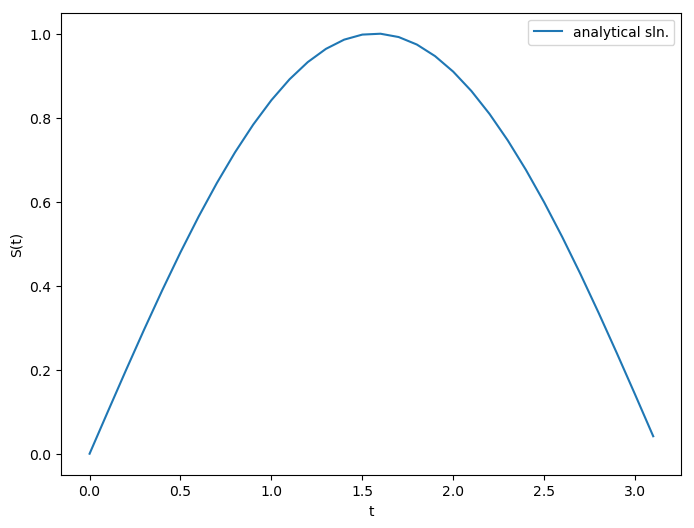

In [7]:
plt.figure(figsize = (8, 6))

plt.plot(t_axis, sln_t(t_axis), label = "analytical sln.")

plt.xlabel('t')
plt.ylabel('S(t)')

plt.legend()

plt.show()

### 2. Use *solve\_ivp* to approximate the solution to this initial value problem over the interval $[0, \pi]$.

In [8]:
from scipy.integrate import solve_ivp

In [20]:
# Define slope, RHS of the ODE:

f_ode = lambda t, s: np.cos(t)

# Numerical sln using sympy

sln_num = solve_ivp(f_ode, [0, np.pi], [0], method='RK45', t_eval = t_axis)

In [21]:
print(sln_num.t)

print(sln_num.y[0])

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1]
[0.         0.09983342 0.19869022 0.29557795 0.3894921  0.4794848
 0.5646653  0.64419999 0.71731234 0.78328299 0.84144965 0.8912072
 0.9319568  0.96324802 0.98485892 0.99664808 0.99855345 0.99059238
 0.97286155 0.94553705 0.90887432 0.86320818 0.80895283 0.74660183
 0.67672811 0.59998398 0.51710113 0.4288906  0.33624283 0.24012761
 0.1415941  0.04177087]


In [22]:
print(sln_num.t.shape)

print(sln_num.y[0].shape)

(32,)
(32,)


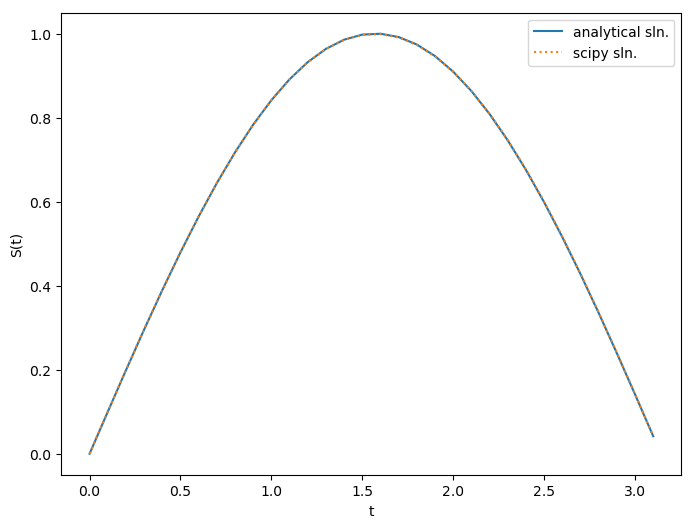

In [23]:
plt.figure(figsize = (8, 6))

plt.plot(t_axis, sln_t(t_axis), label = "analytical sln.", linestyle = "-")
plt.plot(sln_num.t, sln_num.y[0], label = "scipy sln.", linestyle = ":")

plt.xlabel('t')
plt.ylabel('S(t)')

plt.legend()

plt.show()

### Error:

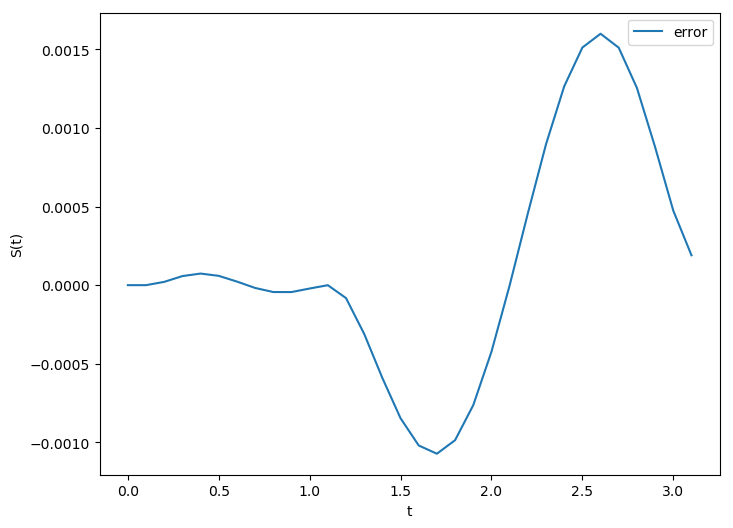

In [25]:
plt.figure(figsize = (8, 6))

plt.plot(t_axis,  sln_num.y[0] - sln_t(t_axis), label = "error", linestyle = "-")

plt.xlabel('t')
plt.ylabel('S(t)')

plt.legend()

plt.show()

## Second solution:

In [26]:
sln_num2 = solve_ivp(f_ode, [0, np.pi], [0], method= "DOP853", t_eval=t_axis, rtol = 1e-8, atol = 1e-8)


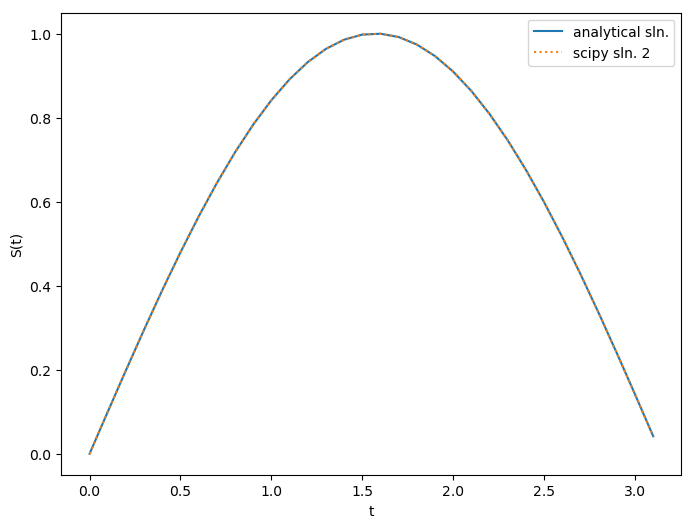

In [27]:
plt.figure(figsize = (8, 6))

plt.plot(t_axis, sln_t(t_axis), label = "analytical sln.", linestyle = "-")
plt.plot(sln_num2.t, sln_num2.y[0], label = "scipy sln. 2", linestyle = ":")

plt.xlabel('t')
plt.ylabel('S(t)')

plt.legend()

plt.show()

### Error

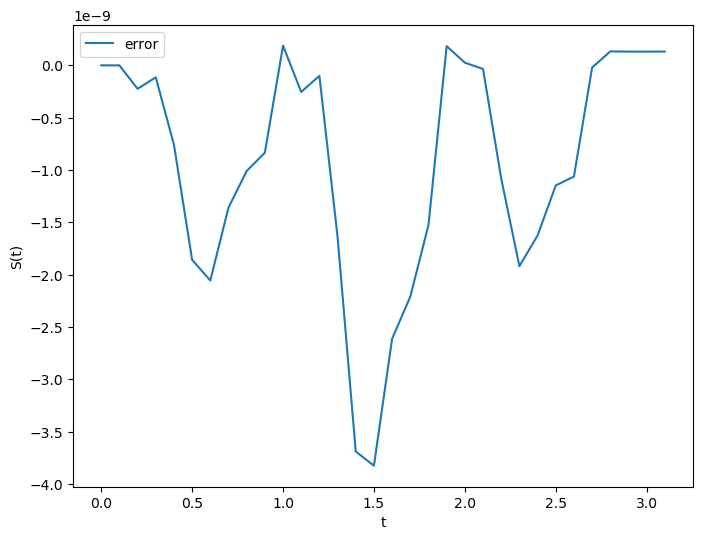

In [28]:
plt.figure(figsize = (8, 6))

plt.plot(t_axis,  sln_num2.y[0] - sln_t(t_axis), label = "error", linestyle = "-")

plt.xlabel('t')
plt.ylabel('S(t)')

plt.legend()

plt.show()

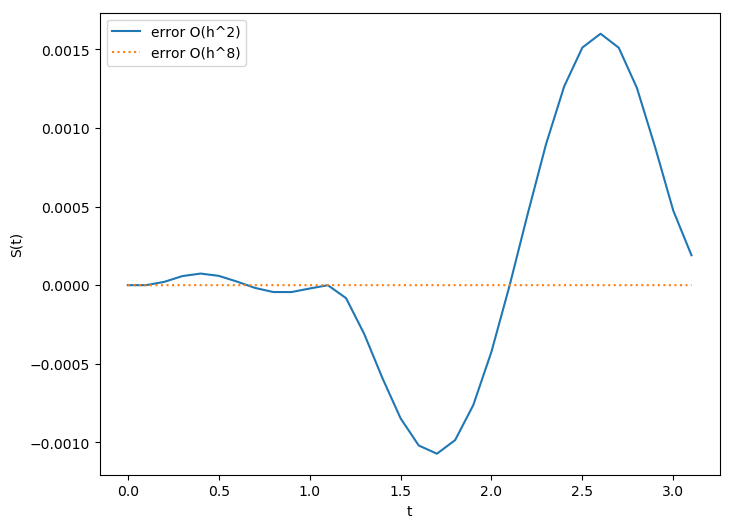

In [30]:
plt.figure(figsize = (8, 6))

plt.plot(t_axis,  sln_num.y[0] - sln_t(t_axis), label = "error O(h^2)", linestyle = "-")
plt.plot(t_axis,  sln_num2.y[0] - sln_t(t_axis), label = "error O(h^8)", linestyle = ":")

plt.xlabel('t')
plt.ylabel('S(t)')

plt.legend()

plt.show()

### Systems of ODEs

**EXAMPLE:**

Let the state of a system be defined by $S(t) = \left[\begin{array}{c} x(t) \\y(t) \end{array}\right]$, and let the evolution of the system be defined by the ODE

$$
\frac{dS(t)}{dt} = \left[\begin{array}{cc}
0 & t^2 \\
-t & 0
\end{array}\right]S(t).
$$

Use *solve\_ivp* to solve this ODE for the time interval $[0, 10]$ with an initial value of $S_0 = \left[\begin{array}{c} 1 \\1 \end{array}\right]$. Plot the solution in ($x(t), y(t)$).

In [31]:
func = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

In [33]:
t_axis = np.arange(0, 10.01, 0.01)

sln = solve_ivp(func, [0, 10], [1, 1], method= "RK45", t_eval=t_axis)


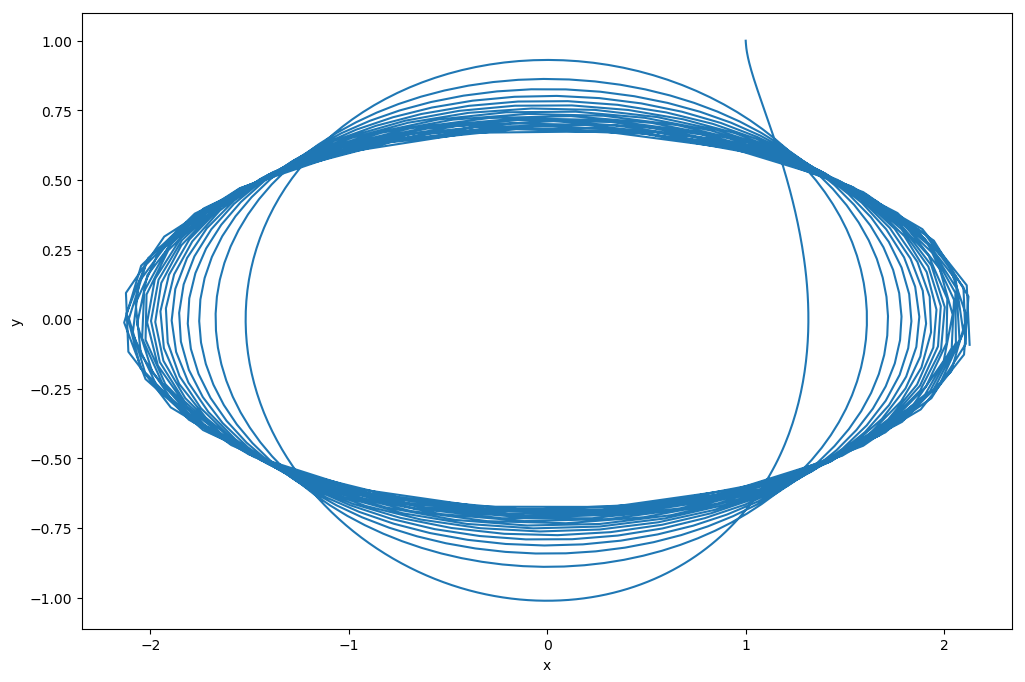

In [34]:
plt.figure(figsize = (12, 8))

plt.plot(sln.y.T[:, 0], sln.y.T[:, 1])

plt.xlabel('x')
plt.ylabel('y')

plt.show()

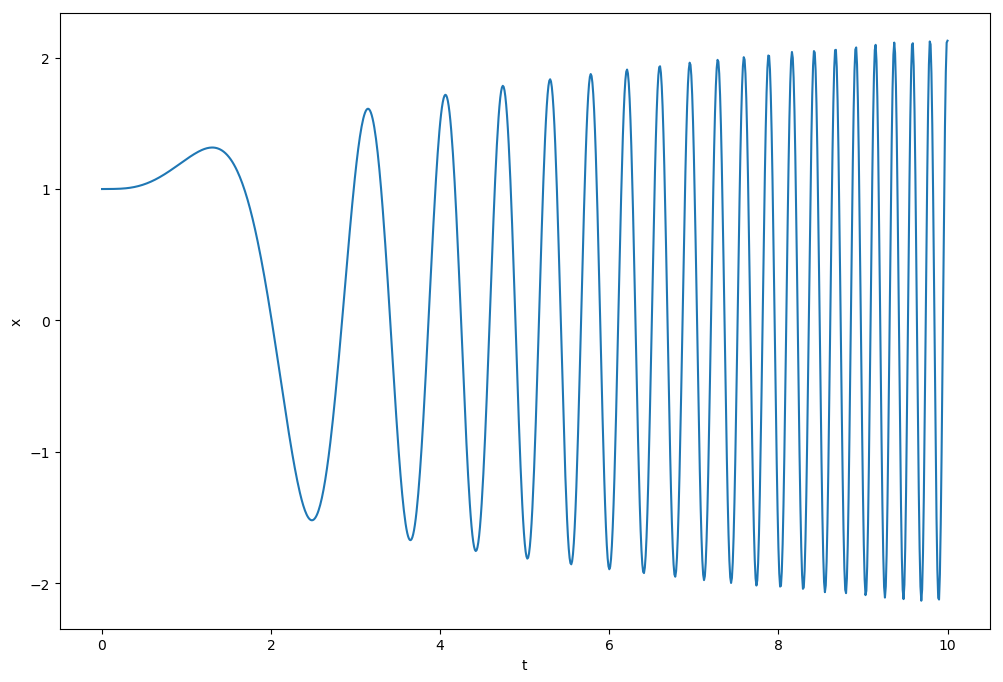

In [36]:
plt.figure(figsize = (12, 8))

plt.plot(sln.t, sln.y.T[:, 0])

plt.xlabel('t')
plt.ylabel('x')

plt.show()

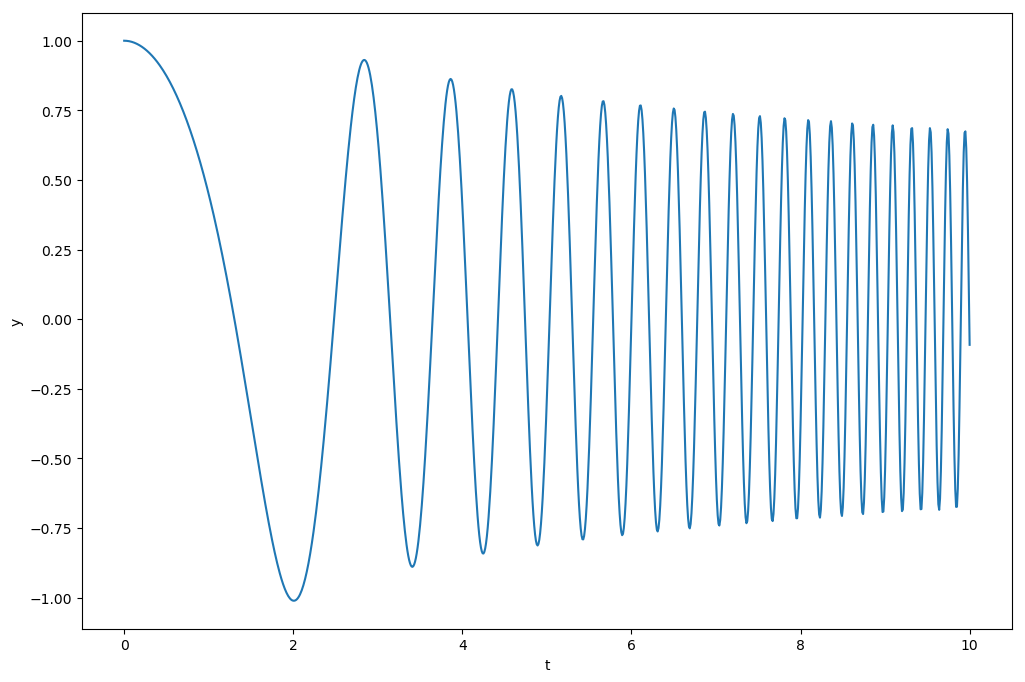

In [37]:
plt.figure(figsize = (12, 8))

plt.plot(sln.t, sln.y.T[:, 1])

plt.xlabel('t')
plt.ylabel('y')

plt.show()

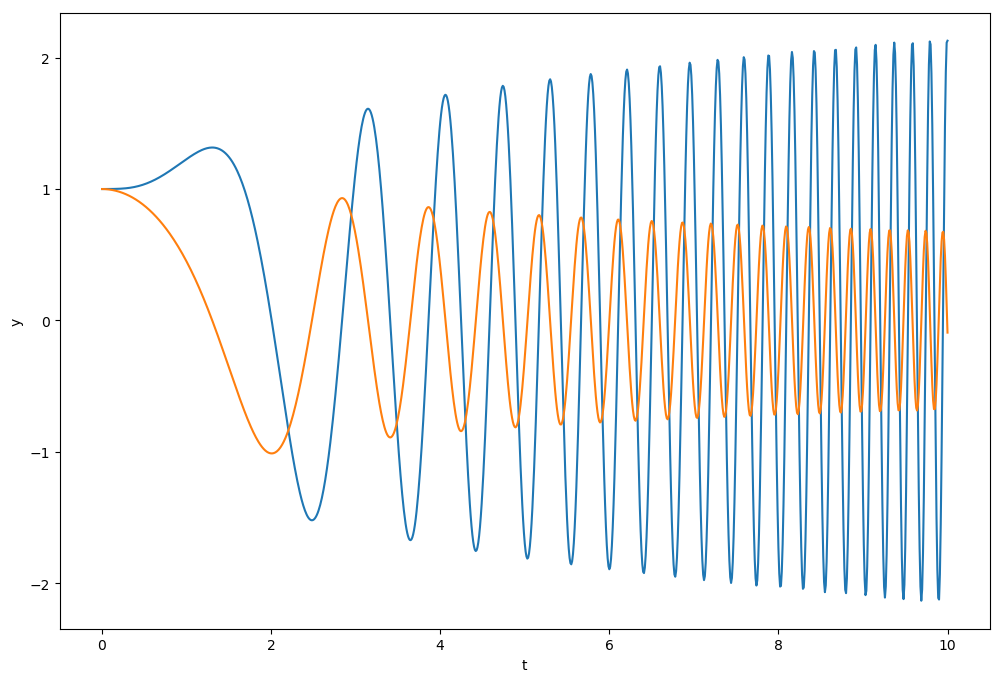

In [38]:
plt.figure(figsize = (12, 8))

plt.plot(sln.t, sln.y.T[:, 0])
plt.plot(sln.t, sln.y.T[:, 1])

plt.xlabel('t')
plt.ylabel('y')

plt.show()